In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torchvision import datasets, transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize(128), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 8

In [3]:
train_dataset = datasets.ImageFolder('./train_medium/', transform=transform)
val_dataset = datasets.ImageFolder('./val_medium/', transform=transform)

In [4]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

classes = ('footway', 'primary')

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()

        # 3 input image channel, 6 output channels, 5x5 square convolution

        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 29 * 29, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(30):  # loop over the dataset multiple times

    running_loss = 0.0
    print(len(train_loader))
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()        
        if i % 20 == 19:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 20:.3f}')
            running_loss = 0.0

print('Finished Training')

63
[1,    20] loss: 0.000
[1,    40] loss: 0.000
[1,    60] loss: 0.000
63
[2,    20] loss: 0.000
[2,    40] loss: 0.000
[2,    60] loss: 0.000
63
[3,    20] loss: 0.000
[3,    40] loss: 0.000
[3,    60] loss: 0.000
63
[4,    20] loss: 0.000
[4,    40] loss: 0.000
[4,    60] loss: 0.000
63
[5,    20] loss: 0.000
[5,    40] loss: 0.000
[5,    60] loss: 0.000
63
[6,    20] loss: 0.000
[6,    40] loss: 0.000
[6,    60] loss: 0.000
63
[7,    20] loss: 0.000
[7,    40] loss: 0.000
[7,    60] loss: 0.000
63
[8,    20] loss: 0.000
[8,    40] loss: 0.000
[8,    60] loss: 0.000
63
[9,    20] loss: 0.000
[9,    40] loss: 0.000
[9,    60] loss: 0.000
63
[10,    20] loss: 0.000
[10,    40] loss: 0.000
[10,    60] loss: 0.000
63
[11,    20] loss: 0.000
[11,    40] loss: 0.000
[11,    60] loss: 0.000
63
[12,    20] loss: 0.000
[12,    40] loss: 0.000
[12,    60] loss: 0.000
63
[13,    20] loss: 0.000
[13,    40] loss: 0.000
[13,    60] loss: 0.000
63
[14,    20] loss: 0.000
[14,    40] loss: 0.000
[

In [9]:
PATH = './test_1.pth'
torch.save(net.state_dict(), PATH)

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    print("a", img.shape)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

a torch.Size([3, 132, 1042])


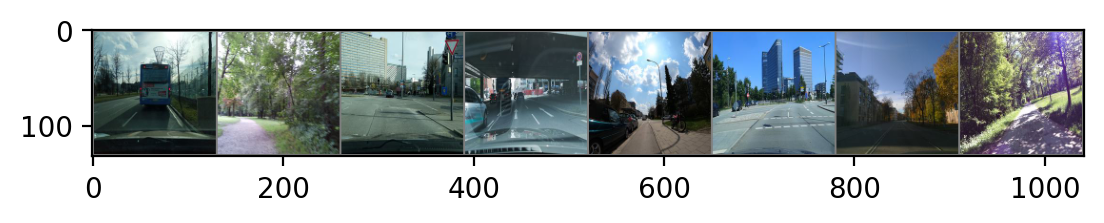

GroundTruth:  primary footway primary primary footway primary primary footway


In [15]:
dataiter = iter(val_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [16]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [17]:
outputs = net(images)

a torch.Size([3, 132, 1042])


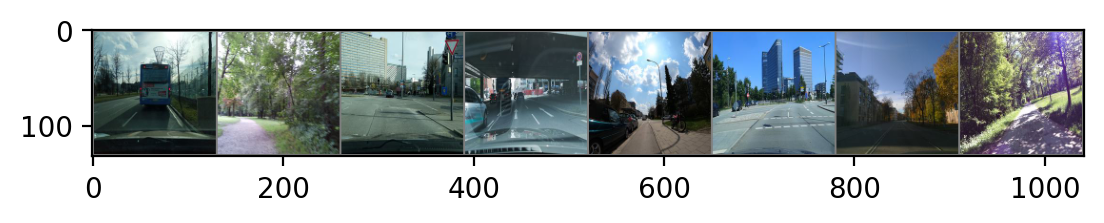

GroundTruth:  primary footway primary primary footway primary primary footway
Predicted:  primary footway primary primary primary primary primary footway


In [18]:
_, predicted = torch.max(outputs, 1)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(batch_size)))

In [19]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in val_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 89 %
